### Bound.py Demo
---

Translated from the MATLAB script written by Craig Lent

**Dependencies for Bound.py**
```
numpy
scipy
```

You can install the latest version of these packages in your python3 environment using:

``python3 -m pip install --upgrade <package>``

In [1]:
from bound import Bound
help(Bound)

Help on function Bound in module bound:

Bound(vpot, x)
    This script is a translation of the 'Bound.m' MATLAB
    script written by Craig Lent. It should be inpirted into
    a Python3 script. This script also requires the numpy package to
    be installed.
    
    Usage: Solves a 1-D Schodinger bound-state problem using an FEM
           method
    
    args:
        vpot: Potential at x nodes (numpy array of shape (numnp,))
        x:    x nodes (numpy array of shape (numnp,))
    
    returns:
        eigs, vecs
        
        eigs: sorted eigenvalues and eigenvectors
              (numpy array of shape (numnp-2,)
              with units in eV)
    
        vecs: sorted corresponding unnormalized
              eigenvectors (numpy arrray of shape
              (numnp,numnp-2) )



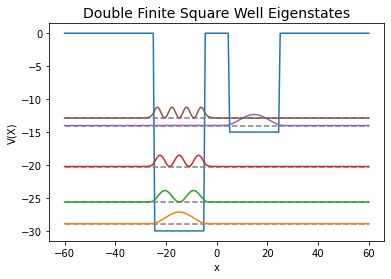

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = 20.
b = 10.

v_0 = 15.
psi_amplitude=20.0

V_well = lambda x : np.piecewise(x, [
        (-(b/2.+a) <= x) & (x <= -b/2.), # left well
        (b/2. <= x) & (x <= (b/2. + a)) # right well
    ], [-2*v_0, -v_0, 0.0])

x = np.linspace(-3*a,3*a, 200)
V = V_well(x)

x_norm = x/v_0
V_norm = V/v_0

psi_n, E_n = Bound(V,x)
E_n = E_n.real

plt.figure()
plt.plot(x,V)

for i in range(5):
    psi = psi_n[:,i]
    psi_pdf = (np.conj(psi)*psi).real*psi_amplitude + E_n[i]
    plt.plot(x,np.ones(x.shape)*E_n[i], 'grey', linestyle='--')
    plt.plot(x,psi_pdf)

plt.xlabel('x')
plt.ylabel('V')
plt.title('Double Finite Square Well Eigenstates',
             fontsize=14)
plt.show()

